9
672698.0
14008.0
12006.0
10621.0
3095.0
2420.5
2419.5
1658.5
4.0
9
Three Hearts 1579 428


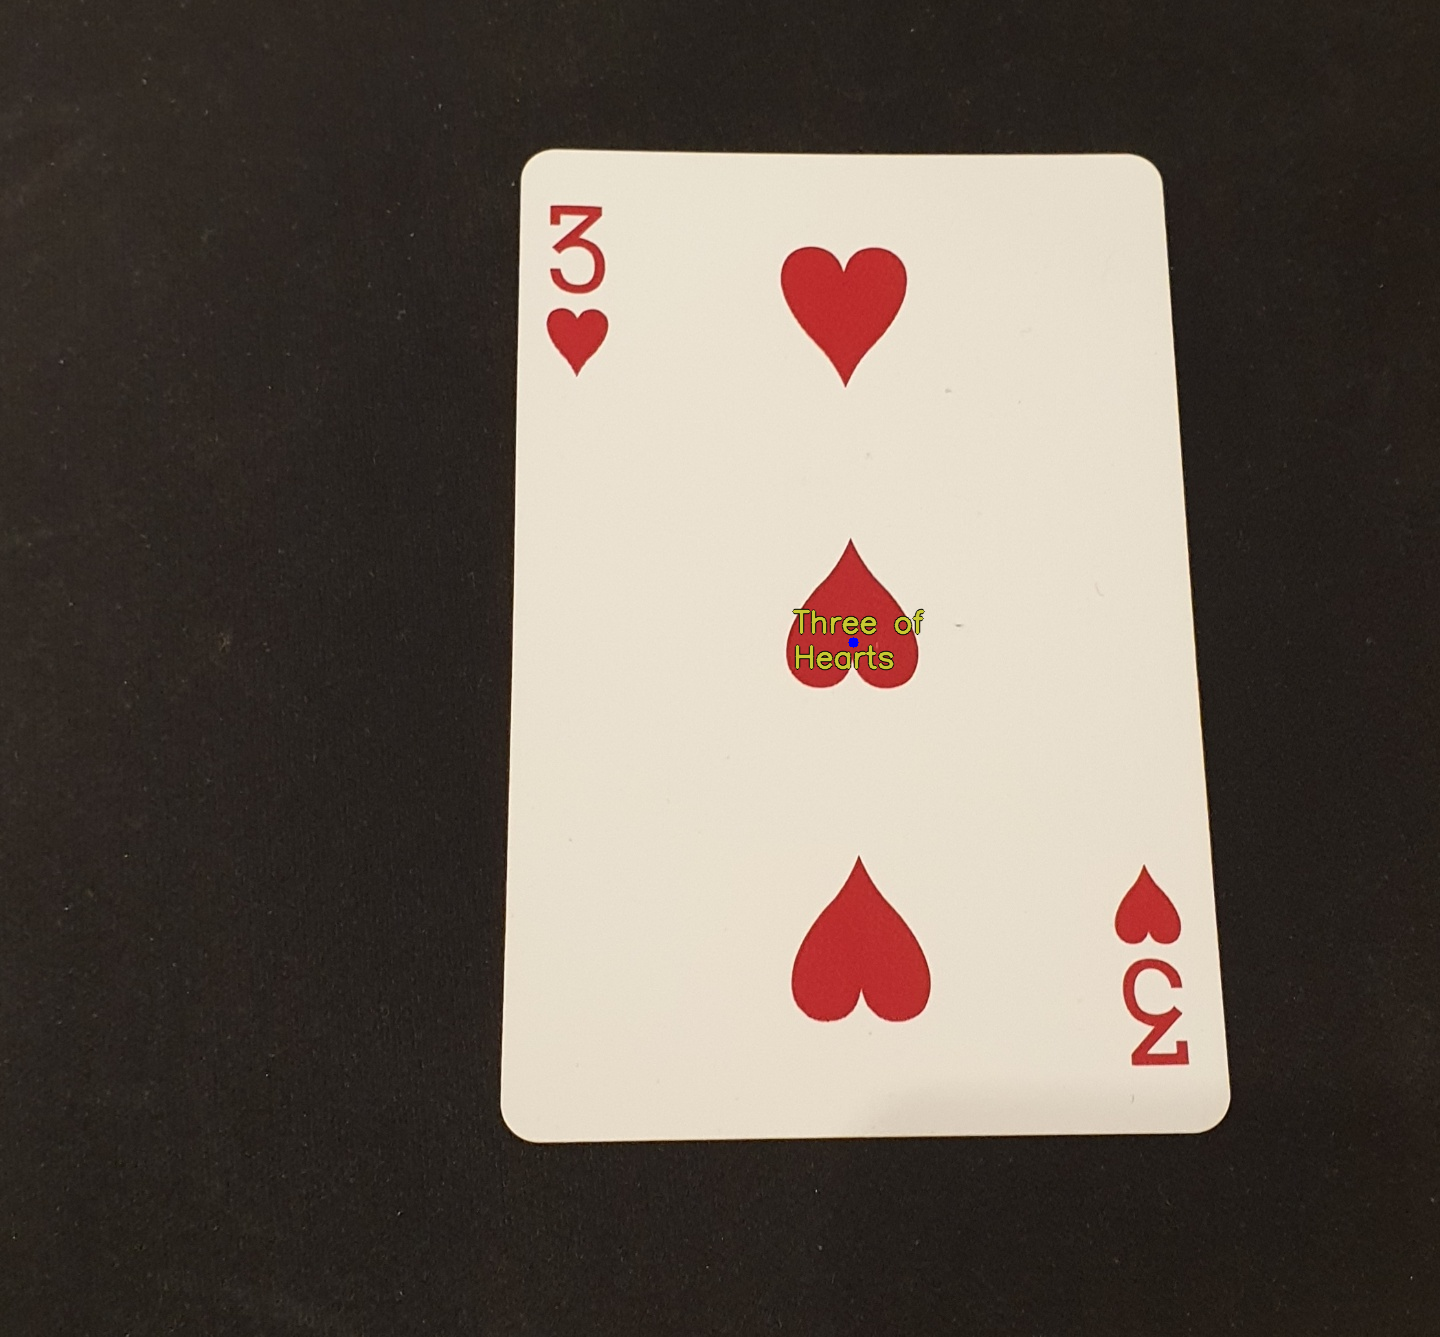

In [ ]:
import cv2
import numpy as np
import time
import os
import Cards
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_SIMPLEX

path = os.path.dirname(os.path.abspath('/content/__file__'))
train_ranks = Cards.load_ranks( path + '/Card_Imgs/')
train_suits = Cards.load_suits( path + '/Card_Imgs/')

file_name='heart3.jpg'

cam_quit = 0

while cam_quit == 0:
    image = cv2.imread(file_name)
    pre_proc = Cards.preprocess_image(image)
    cnts_sort, cnt_is_card = Cards.find_cards(pre_proc)
    print(len(cnts_sort))
    cards = []
    k = 0

        # For each contour detected:
    for i in range(len(cnts_sort)):
        if (cnt_is_card[i] == 1):

            # Create a card object from the contour and append it to the list of cards.
            # preprocess_card function takes the card contour and contour and
            # determines the cards properties (corner points, etc). It generates a
            # flattened 200x300 image of the card, and isolates the card's
            # suit and rank from the image.
            cards.append(Cards.preprocess_card(cnts_sort[i],image))

            # Find the best rank and suit match for the card.
            cards[k].best_rank_match,cards[k].best_suit_match,cards[k].rank_diff,cards[k].suit_diff = Cards.match_card(cards[k],train_ranks,train_suits)

            # Draw center point and match result on the image.
            image = Cards.draw_results(image, cards[k])
            k = k + 1
    # cv2.putText(image,(10,26),font,0.7,(255,0,255),2,cv2.LINE_AA)
    # cv2.putText(image,(10,26),font,1,(255,0,255),2,cv2.LINE_AA)
    cv2_imshow(image)
    cv2.imwrite('detected_'+file_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section